# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity:*  
- *Call Option – Spot Price Sensitivity:*  
- *Put Option – Time Sensitivity:*  
- *Put Option – Spot Price Sensitivity:*  

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)




# Part a - C(t) & dC/dt

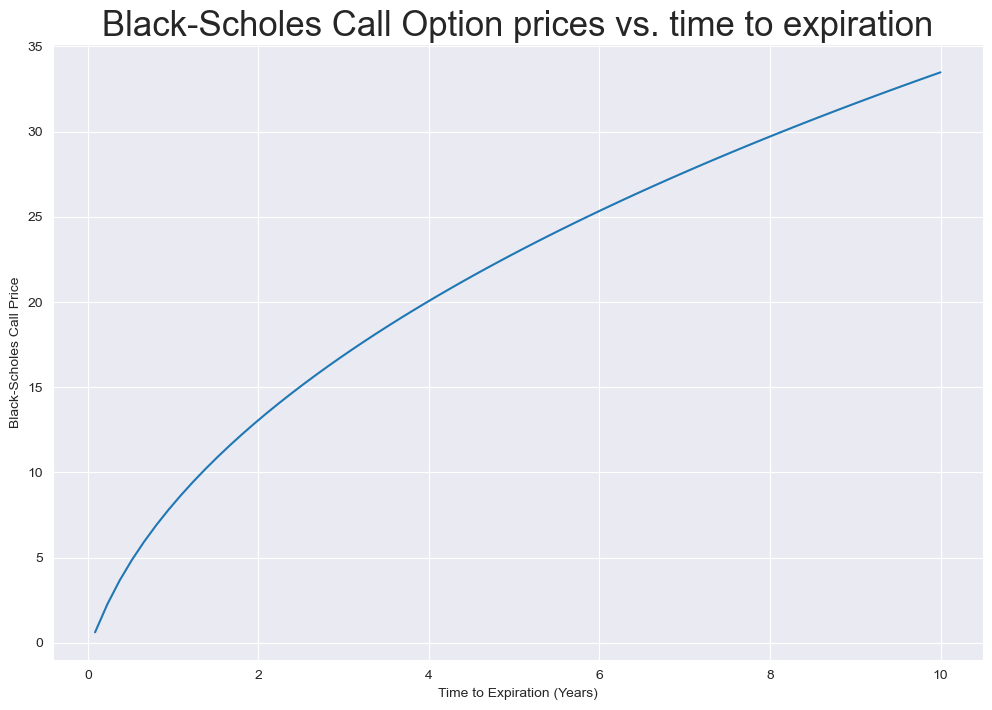

In [68]:
S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 10, 70)


call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Black-Scholes Call Option prices vs. time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration (Years)')
plt.ylabel('Black-Scholes Call Price')
plt.show()

In [ ]:
# This makes sense because the longer the time to expiration, the more uncertainty there is about the future price of the underlying asset, which increases the value of the call option.
# It also makes sense from the B-S formula itself to expect that the call price increases with time to expiration, since the term involving the cumulative distribution function of the normal distribution (norm.cdf) will be larger for larger values of d1 and d2, which in turn increase as the time to expiration increases.

# However, one can see that the slope of this curve is decreasing as time increases. 
# One can see that this curve is almost a sqrt(t) function, which is easily seen in d1 and d2 definitions. When t increases the sqrt(t) term dominates.
# It's also possible to see how the cdf function saturates once t->Infinity, which indicates a saturation in the B-S call price, and hence the slope approaches 0 (Who is gonna buy a call option with infinite expiration date anyway?)

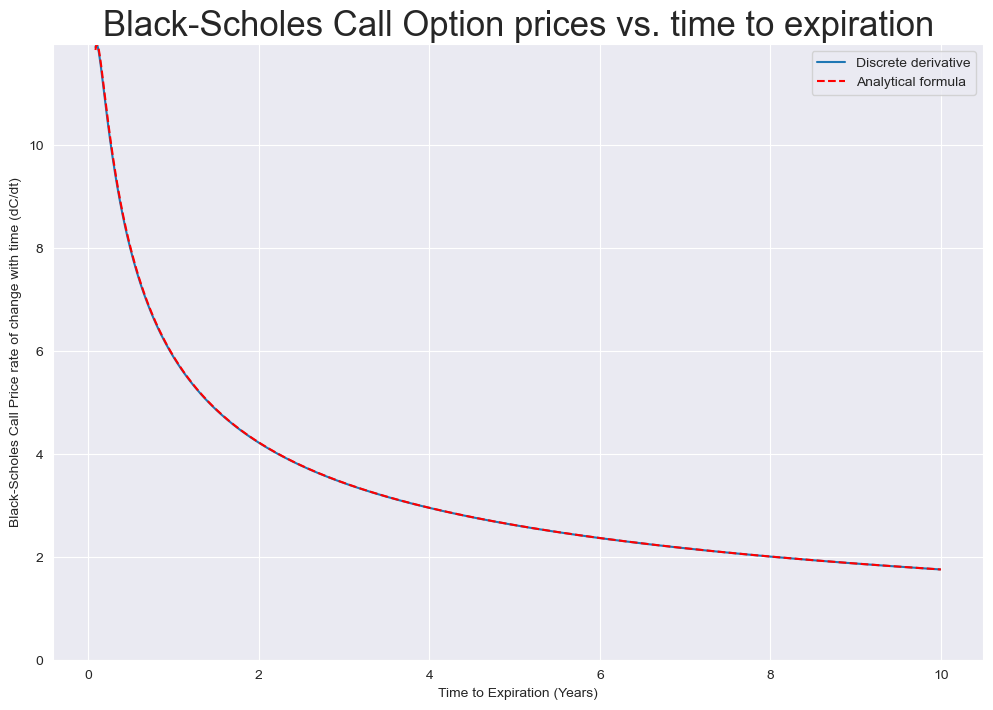

In [ ]:
# dC/dt vs. t
S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 10, 1000)

# Deriving this analytically is quite a mess, but we can do it!
d1 = (np.log(S0/K) + (0+.5*sigma**2)*times)/(sigma*np.sqrt(times))
d2 = d1 - sigma*np.sqrt(times)

dd1dt=-0.5*np.log(S0/K)*1/(sigma*pow(times,-1.5))+0.5*(0+sigma**2/2)/(sigma*pow(times,-0.5))
dd2dt=dd1dt-0.5*sigma*pow(times,-0.5)

def phi(d):
    return np.exp(-d**2/2)/np.sqrt(2*np.pi)

analytically_dCdtvst=S0*phi(d1)*dd1dt-K*phi(d2)*dd2dt


call_prices_slopes = [(bs_call(S0,K,sigma, t = times[i+1])-bs_call(S0,K,sigma, t = times[i]))/(times[i+1]-times[i]) for i in range(len(times)-1)]


plt.figure(figsize = (12,8))
plt.title('Black-Scholes Call Option prices rate of change vs. time to expiration', size = 25)
plt.plot(times[:-1], call_prices_slopes, label='Discrete derivative')
plt.plot(times,analytically_dCdtvst, 'r--', label='Analytical formula')
plt.xlabel('Time to Expiration (Years)')
plt.ylabel('Black-Scholes Call Price rate of change with time (dC/dt)')
plt.legend()
plt.ylim(0,max(call_prices_slopes))
plt.show()

In [ ]:
# Why this makes sense?
# As the time of expiration increases, the uncertainty about the future price of the underlying asset decreases, based on my understanding, as time increases significantly one starts to expect the average behavior for the stock price, which is more towards the mean price of GBM, S0.
# Hence, for longer and longer times, the rate of change of the call price with respect to time decreases, as the uncertainty about the future price of the underlying asset decreases (We know if the price is above or below the strike price).

# Part b - C(S0) & dC/dS0


C:\Users\ayman\AppData\Local\Temp\ipykernel_8952\3757517427.py:24: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))


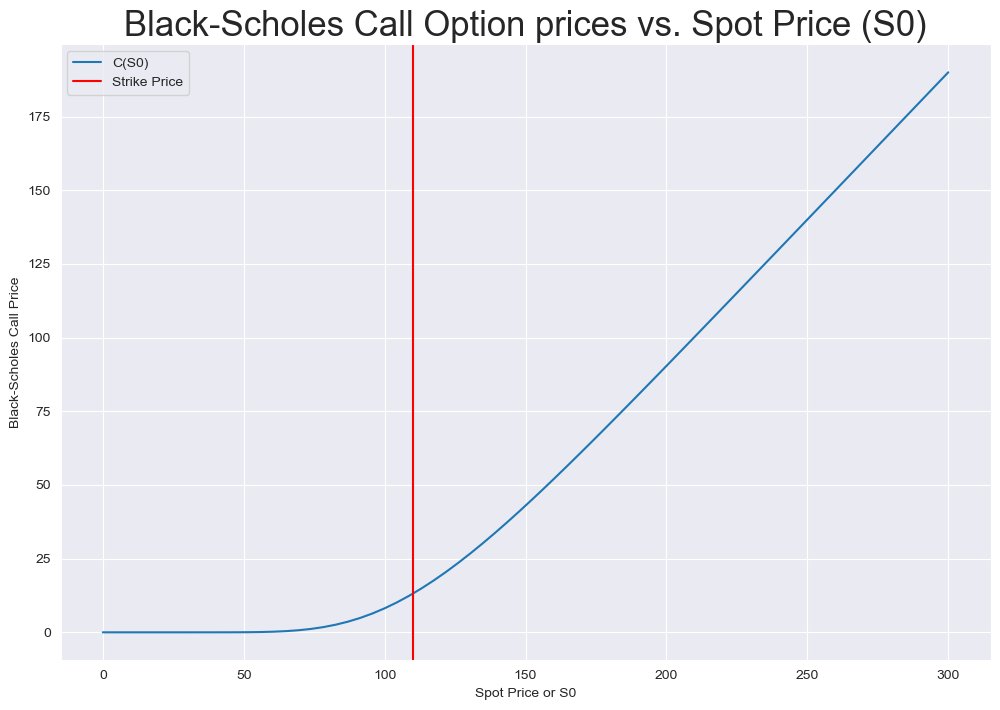

In [64]:
S0 = np.linspace(0,300,70)
K = 110
sigma = .3
time = 1 # Choosing one year to expiration


call_prices = [bs_call(S0[i] ,K , sigma, t = time) for i in range(len(S0))]


plt.figure(figsize = (12,8))
plt.title('Black-Scholes Call Option prices vs. Spot Price (S0)', size = 25)
plt.plot(S0, call_prices, label='C(S0)')
plt.axvline(K,0,max(S0), c='red', label='Strike Price')
plt.xlabel('Spot Price or S0')
plt.legend()
plt.ylabel('Black-Scholes Call Price')
plt.show()

In [ ]:
# The call price increases with the spot price as one can expect intutively from the definition.
# One can also see the functional form being something like Log(S0), which is given in the definition of d1 and d2, but it seems more linear later on, which one can also see from the definition of the B-S call price, as S0 increases the cdf is almost constant and the linear term in C(0) dominates.

# For the rate of change, the slope is increasing as S0 increases then it saturates. It starts slow below the strike price, but then becomes more obvious, and eventually saturates at a given value.
# Due to this linear behavior later on, one can see why the slope should become constant, which is seen from the analytical discussion of delta hedging that we did.

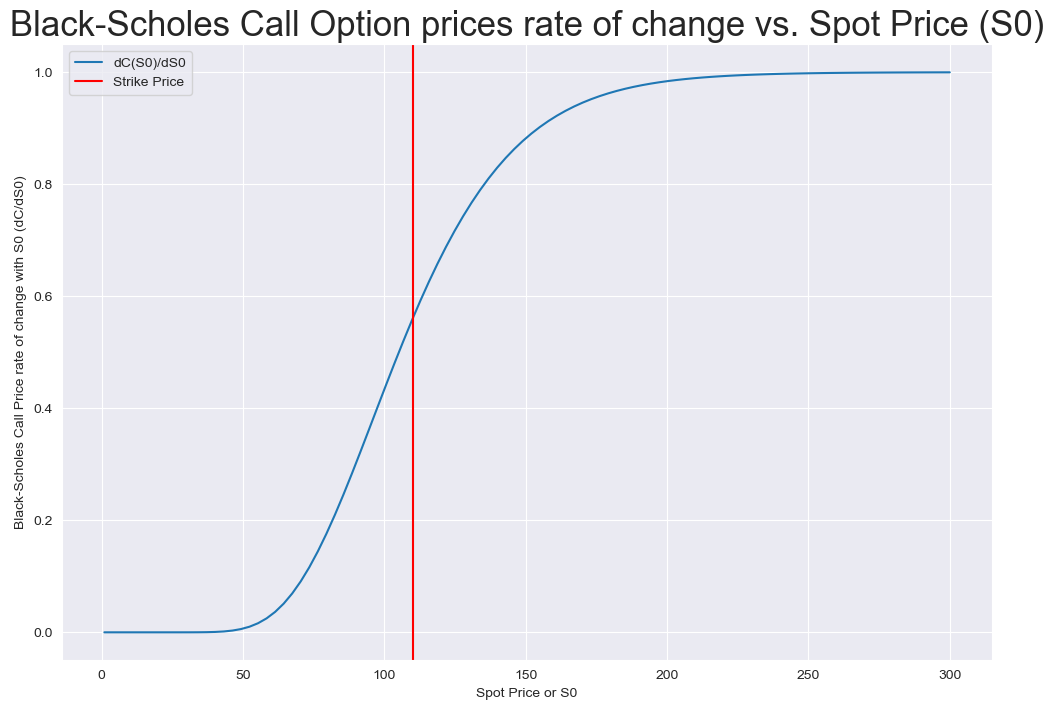

In [45]:
S0 = np.linspace(1,300,100)
K = 110
sigma = .3
time = 1 # Choosing one year to expiration


def d1(S00):
    return (np.log(S00/K) + (0+.5*sigma**2)*time)/(sigma*np.sqrt(time))


call_prices_slopes = [norm.cdf(d1(S0[i])) for i in range(len(S0))]


plt.figure(figsize = (12,8))
plt.title('Black-Scholes Call Option prices rate of change vs. Spot Price (S0)', size = 25)
plt.plot(S0, call_prices_slopes, label='dC(S0)/dS0')
plt.axvline(K,0,max(S0), c='red', label='Strike Price')
plt.xlabel('Spot Price or S0')
plt.legend()
plt.ylabel('Black-Scholes Call Price rate of change with S0 (dC/dS0)')
plt.show()

In [ ]:
# Why this makes sense?
# Above the strike price, one can expect the call option to be in-the-money, and hence the delta (dC/dS0) to be positive and increasing.
# However, for large S0, The call option is guranteed to be winning, and hence there ends up being a constant rate of change that's the maximum possible rate of change for the call option, which is 1, i.e., C(0) ~ S0-K.

# One can think about this from hedging perspective, where the delta of the call option is the number of shares that one needs to buy to hedge the call option.
# This delta is the rate of change we just calculated, so it makes sense to be between 0-1 share of that stock.
# If the spot price is already higher than the strike price, then one has to buy that stock again to maximize the profit, hence the delta is 1.
# On the other hand, if the spot price is much lower than the strike price, then hedging becomes less favorable, and hence the delta approaches 0.

# Part c - P(0) and dP/dt & dP/dS0

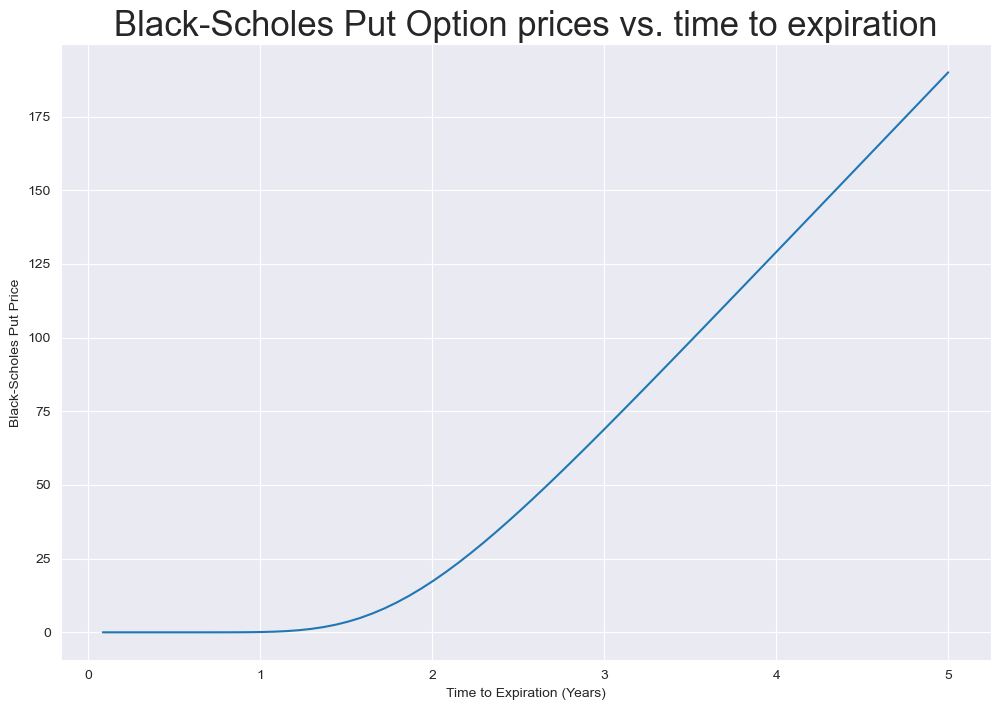

In [ ]:
# P(0) vs. t
S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)


put_prices = [bs_put(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Black-Scholes Put Option prices vs. time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration (Years)')
plt.ylabel('Black-Scholes Put Price')
plt.show()

In [ ]:
# Same behavior as the call option in terms of its increase with the time to expiration, since it becomes more profitable and more uncertain for the stoke price as time increases.

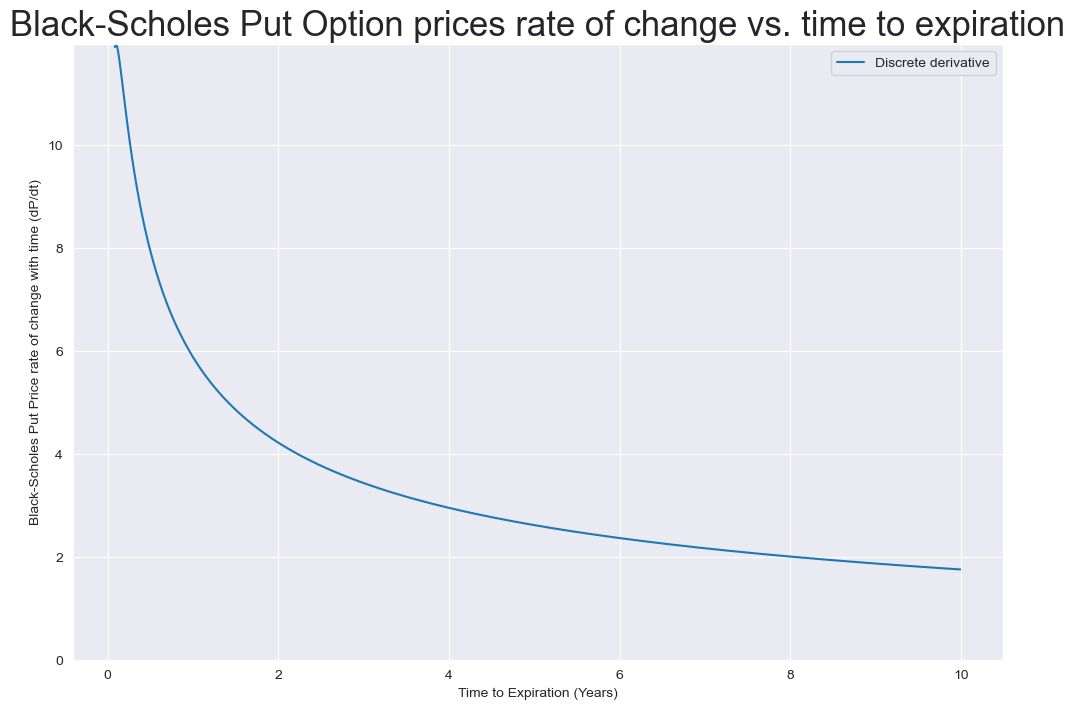

In [50]:
# dP/dt vs. t - From the put-call parity, we know that dC/dt=dP/dt for the zero-interest case.
S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 10, 1000)


put_prices_slopes = [(bs_put(S0,K,sigma, t = times[i+1])-bs_put(S0,K,sigma, t = times[i]))/(times[i+1]-times[i]) for i in range(len(times)-1)]


plt.figure(figsize = (12,8))
plt.title('Black-Scholes Put Option prices rate of change vs. time to expiration', size = 25)
plt.plot(times[:-1], put_prices_slopes, label='Discrete derivative')
plt.xlabel('Time to Expiration (Years)')
plt.ylabel('Black-Scholes Put Price rate of change with time (dP/dt)')
plt.legend()
plt.ylim(0,max(put_prices_slopes))
plt.show()

In [ ]:
# The decrease in the rate of change is observed here as well, which I guess makes sense given how there shouldn't be much change in the B-S put price as time increases significantly.
# Same logic follows from the behavior of the call-options discussion.

C:\Users\ayman\AppData\Local\Temp\ipykernel_8952\3757517427.py:47: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))


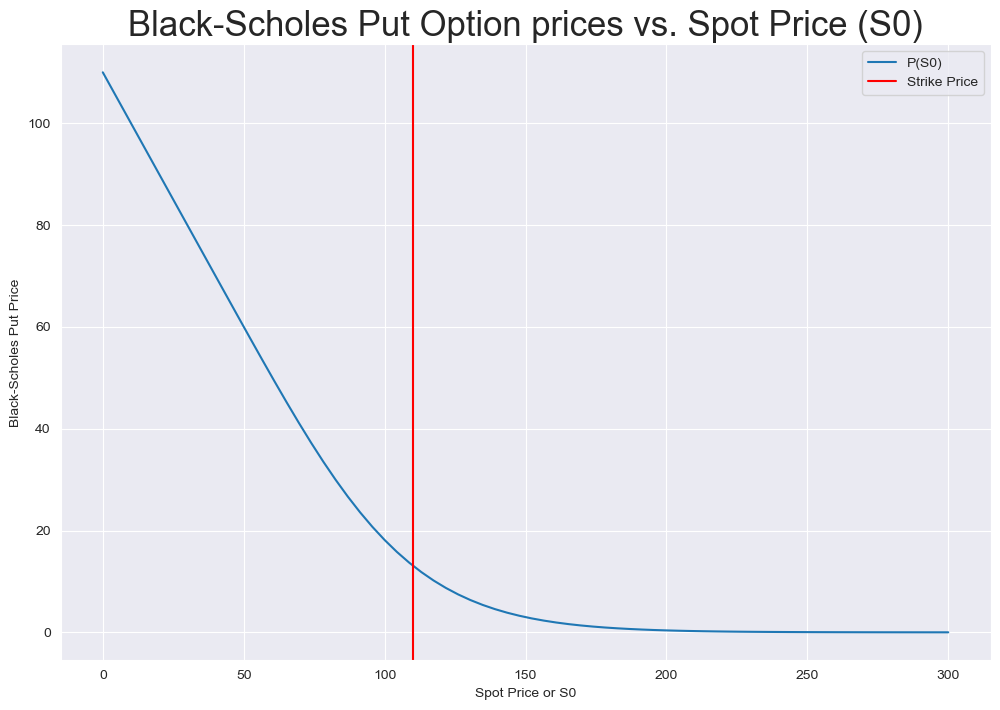

In [53]:
S0 = np.linspace(0,300,70)
K = 110
sigma = .3
time = 1 # Choosing one year to expiration


put_prices = [bs_put(S0[i] ,K , sigma, t = time) for i in range(len(S0))]


plt.figure(figsize = (12,8))
plt.title('Black-Scholes Put Option prices vs. Spot Price (S0)', size = 25)
plt.plot(S0, put_prices, label='P(S0)')
plt.axvline(K,0,max(S0), c='red', label='Strike Price')
plt.xlabel('Spot Price or S0')
plt.legend()
plt.ylabel('Black-Scholes Put Price')
plt.show()

In [ ]:
# The lower the spot price the higher the pay-off of the put-option or the lower the spot price the higher the premium one would charge for that option; hence, higher expected profit for the buyer.
# The slopes start negative constant and then increase to zero as one would expect a much lower pay-off with increases spot price.

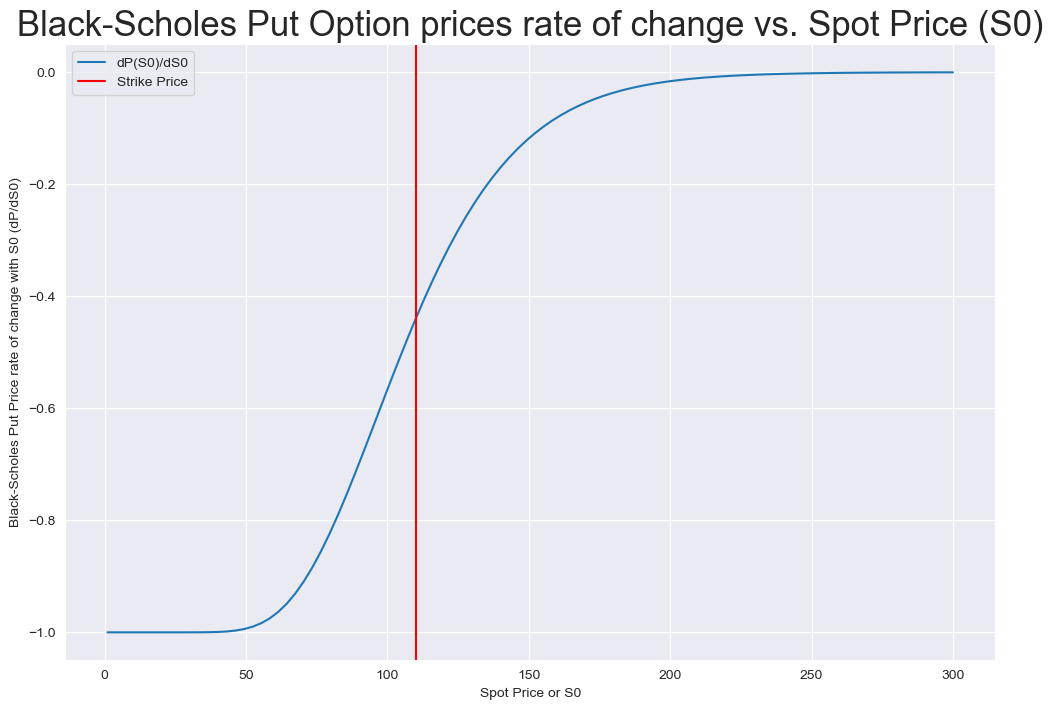

In [54]:
S0 = np.linspace(1,300,100)
K = 110
sigma = .3
time = 1 # Choosing one year to expiration


def d1(S00):
    return (np.log(S00/K) + (0+.5*sigma**2)*time)/(sigma*np.sqrt(time))


put_prices_slopes = [norm.cdf(d1(S0[i]))-1 for i in range(len(S0))] # Using call-put parity


plt.figure(figsize = (12,8))
plt.title('Black-Scholes Put Option prices rate of change vs. Spot Price (S0)', size = 25)
plt.plot(S0, put_prices_slopes, label='dP(S0)/dS0')
plt.axvline(K,0,max(S0), c='red', label='Strike Price')
plt.xlabel('Spot Price or S0')
plt.legend()
plt.ylabel('Black-Scholes Put Price rate of change with S0 (dP/dS0)')
plt.show()

In [ ]:
# Why this makes sense?
# Below the strike price, one can expect the put option to be in-the-money, and hence the delta (dP/dS0) to be negative and increasing.
# However, for smaller S0, The put option is guranteed to be winning, and hence there ends up being a constant rate of change that's the minimum possible rate of change for the put option, which is -1, i.e., P(0) ~ K-S0.
# Similarly, above the strike price, the put option is out-of-the-money, and hence the delta (dP/dS0) is zero, which is the maximum possible rate of change for the put option.